# SCRATCH PAD

it is drastically important to implement some form of automatic 'dirty' dataset updates (original source documents).  have to go back and update ALL of my findings, markdown, formulas, etc literally every time i find inconsistencies in the data is a serious issue that involves alot of work refactoring and updating everything.  need to implement auto update pipeline, and possibly auto-generated documentation updates.  for now ill settle for implementing an update notebook that updates the raw originals so i can keep the data pipeline up to date. allowing the datasets to become outdated by more than 6 months - 1 year can change results DRASTICALLY

todo soon: remove original dataset files, force running pipeline_refresher to get original source documentation.  this enforces data freshness and my distribution concerns

I realize i went DEEP down the rabbit hole on this, and way way past expectations, but i dont care.  this is my 4th code:you capstone project, not to mention what classes i passed with kctcs.  At this point, every capstone i complete should be techniqually better than the previous.  I need to be applying what I learn, from pathway to pathway, as I move forward.  I need to showcase my ability to incorporate transferable skills from one project to another, while adapting and evolving to every changing ecosystems, expectations, and standards.

being able to say "30% of high-risk LEO satellites are registered in countries with minimal debris mitigation oversight" adds a layer of depth

Current Focus: back up satcat_cleanup and start over.  need to focus on cleaning satcat dataset independing of ucs.  deep scrub satcat so that it is golden as a stand alone dataset, create a separate notebook to merge, augument, and polish a new 'master' dataset for our analysis'.

This is such a process. I make markdown cells, add code, and slog along.  Then I get to a point where my idea evolves, I have to go back through and change markdown and code to match the feel and vibe of my entire project.  This is actually a whole lot of fun.  

The only purpose for this notebook is to house all of my random 'stuff' like code chunks, thoughts/comments, ideas etc.  No fancy formatting etc, just a paste pad that I can keep with ideas and other such things in raw form. Its like running commentary for my brain sometimes.

I am pretty happy with where the project is at this point in time in comparison to the total amount of time I have before the end of the project.
We are at the end of module 2, and we still have modules 3 and 4 to got.  I have so much time to continue exploring and visualing data, i'm really diggin this pathway.

At the end of the day, the way my brain thinks about this project is that is just one big research project where I get to use real world data and various tools and utilities to deep dive on something I find interesting.  This has been alot of fun!

Thanks to having to learn markdown for the bazillion readmes ive had to make, up to this point, for the 3 - 4 pathway/workshops ive taken, markdown has become infinitely more useful with jupiter notebooks.  Markdown cells truely are superior to code comments both in quality and the level of readibility they provide. It's little readme chunkies whenever i want them. It's almost stupid how full circle thats come, from being forced to make readmes for 4 capstone projects now and hating every second of it, to actually being greatful for the ability to use it through-out my notebook.


In [1]:
# all imports i may need for various code blocks
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from shapely.geometry import Point, Polygon

In [2]:
world = gpd.read_file('../data/original/countries.geojson')

geopanda visual for the "who lives under the "

make sure we do this in a way where we clean everything, not just what we need right now from this version of the datasets.  set up proper cleaning pipelines incase future changes to the datasets introduce bad values for various columns

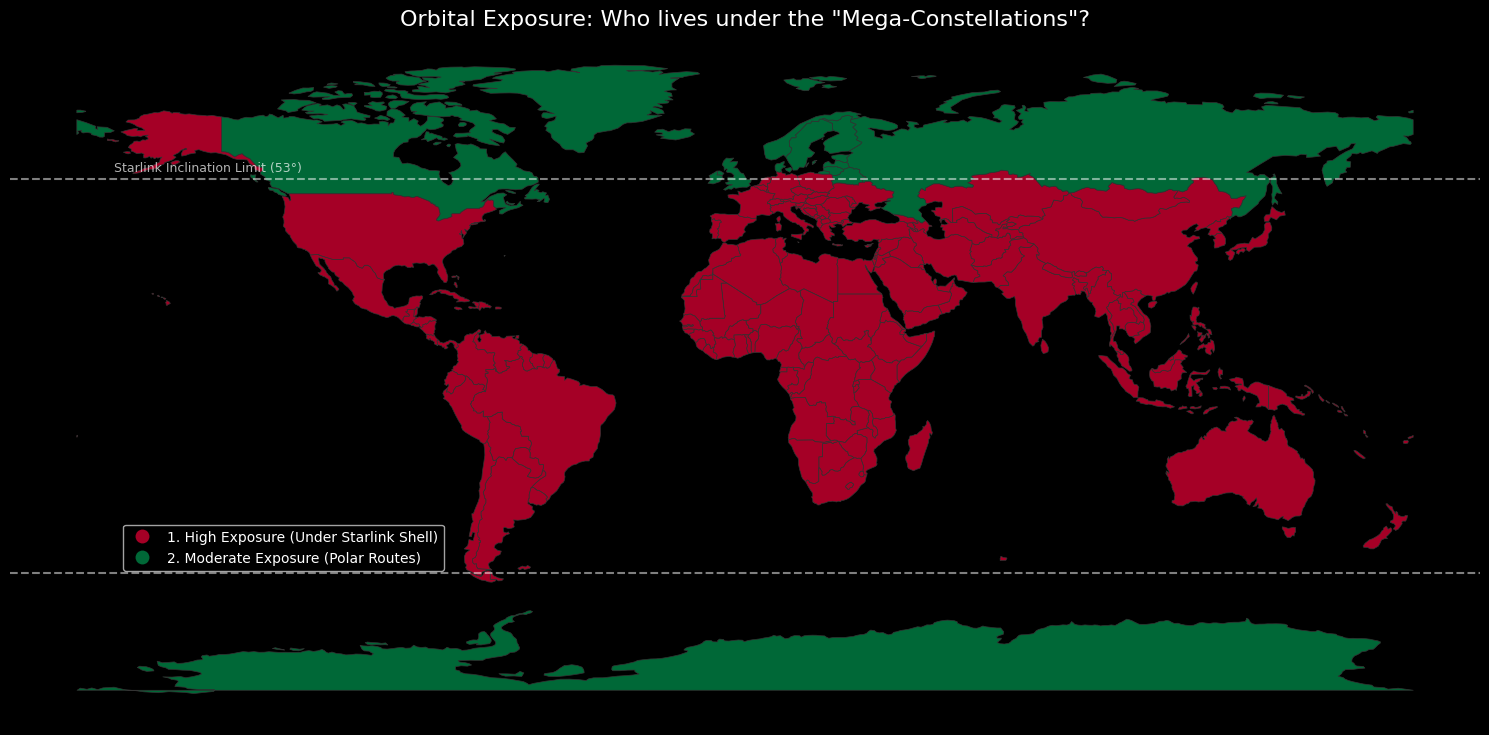

In [3]:
# 1. Convert to World Mercator (EPSG:3395) -> units become meters
# 2. Calculate Centroid
# 3. Convert back to your original Lat/Lon (world.crs)
# 4. Grab the Y (Latitude)
world['lat'] = world.to_crs("EPSG:3395").centroid.to_crs(world.crs).y.abs()

def classify_risk(lat):
    if lat < 53:
        return "1. High Exposure (Under Starlink Shell)"
    elif lat < 80:
        return "2. Moderate Exposure (Polar Routes)"
    else:
        return "3. Low Exposure (Safe Zone)"

world['risk_category'] = world['lat'].apply(classify_risk)

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(15, 8))

world.plot(
    column='risk_category',
    cmap='RdYlGn',     # Red (High Risk) -> Yellow -> Green (Safe)
    legend=True,
    ax=ax,
    edgecolor='#333333',
    linewidth=0.5
)

plt.axhline(53, color='white', linestyle='--', alpha=0.5)
plt.axhline(-53, color='white', linestyle='--', alpha=0.5)
plt.text(-170, 55, "Starlink Inclination Limit (53°)", color='white', fontsize=9, alpha=0.7)

ax.set_title('Orbital Exposure: Who lives under the "Mega-Constellations"?', fontsize=16, color='white')
ax.set_axis_off() # remove lat/lon numbers for a cleaner look

# Fix the Legend position
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.3, 0.3))
for text in leg.get_texts():
    text.set_color("white")

plt.tight_layout()
plt.show()

### **Legacy Cadence: The Steady March**

represents the rhythmic pattern of the space industry as it existed from the dawn of the space age through approximately 2013

constant drumbeat

### **Modern Cadence: The Sprinting Pulse**

represents the fundamental shift in the industry's tempo that occurred with the rise of commercial mega-constellations

heart rate in a sprint

it is an accelerating pulse where the time between launches is rapidly shrinking.


### Math
**First Derivative**

In calculus, the "first derivative" measures the speed of change.  


Comparing how fast launches were increasing in the old model (legacy linear) versus how fast they are increasing in the new model (modern exponential).

We use Brent's Method to find the exact year where the modern exponential growth rate officially surpassed the legacy linear growth rate.

Calculating the slopes lets us compare how fast launches were increasing in the old model versus how fast they were increasing in the new one.

### **[Brent's Method](https://en.wikipedia.org/wiki/Brent%27s_method)**


Using Brent's Method to find the exact moment where the two speeds (slopes) became equal (2014) and we interpret this as the year the transition occurs (root), because the models velocity officially surpasses the legacy trend during that calendar year.

- growth models
  * two distinct mathematical functions help us characterize the two different eras of space flight:
    * steady state (linear growth): $y = mx + b$  
      * $m$ is the constant slope (legacy launch cadence) and $b$ is the intercept.
    * new space (exponential growth): $y = a \cdot e^{b(x-c)}$  
      * $a$ is the scale, $b$ is the growth rate, and $x-c$ is the time elapsed since the baseline year ($c$).
- acceleration math
  * exponential slope (($f'(x)$)): $\frac{d}{dx}[a \cdot e^{b(x-c)}] = a \cdot b \cdot e^{b(x-c)}$
    * calculates the exact slope of the exponential curve at any given year  
- root finding solver
  * root: exact year where the  exponential growth rate ($f'(x)$) officially surpassed the legacy cadence

[Derivatives of Exponential Functions - YouTube](https://www.youtube.com/watch?v=S0_qX4VJhMQ)  

### Double Threat (The Pincer Maneuver)
The "Double Threat" is the fact that these two populations are physically segregating the usable space in LEO:

- **The Floor is Rising**:
  - The "**Commuter Lane**" is becoming so dense with active satellites that the probability of "active-on-active" collisions is skyrocketing.
- **The Ceiling is Heavy**:
  - The "**Deadly Ring**" looms directly above the active constellations. If one of those massive legacy objects breaks apart, the resulting debris cloud will "rain down" into the Commuter Lane.

### Double Threat: What It Means

**The Double Threat** means the "Runner" (**Modern Cadence**) is sprinting through a "**Canyon**" where the walls (**Legacy Cadence**) are made of unmonitored, multi-ton kinetic bombs. You aren't just looking at "**more junk**" — you are looking at two different eras of risk colliding in the same vertical space.

### Supporting Information - Fact Checking, Math Research, Number Verifications

various fact checking, math research, algorithm info, number verifications etc  
i dont like magic numbers, i want to understand where they come from, why they are important, why we use them, etc etc

### **2014 is the year the "Modern Sprint" (exponential growth) officially outpaced the "Legacy March" (linear growth)**
* External data and industry analysis confirm that 2014 was indeed the commencement of the "accelerating growth pattern" that defines the current era.  
* According to the Union of Concerned Scientists (UCS), the dramatic, skyrocketing pattern of active satellites is a trend that "has been building since 2014."  
* 2014 was a pivotal year for the "New Space" economy. This was the year that commercial satellite operators began shifting from large, singular Geosynchronous (GEO)   satellites to the early deployments of Low Earth Orbit (LEO) constellations.
  * In early 2014, major shifts in commercial earth observation and infrared imaging (like the Hera Systems 1HOPSAT-TD) began appearing in the UCS database, signaling the move toward smaller, high-frequency deployments.


### Understanding The Math
### **Pillar 1: The Characterization (Curve Fitting)**

Before you can find the "Acceleration Point," you have to define the two different "Beats" (Cadences) of the industry. We use **Non-Linear Least Squares** to do this.

*   **The Linear Model (The Steady March):** $y = mx + b$ (Slope-Intercept Form)
    
    *   **The Math:** This assumes every year adds the same number of satellites ($m$). We fit this to the data from 1957 to 2013.
        
*   **The Exponential Model (The Sprinting Pulse):** $y = a \cdot e^{b(x-c)}$ (Exponential Growth/Decay Model)
    
    *   **The Math**:
        * This assumes the growth rate is proportional to the current population. The more satellites we have, the faster we can launch more.
            * \($a$\) represents the initial amount (when \(x=c\)), \(b\) is the rate constant, and \(c\) is a horizontal shift (or phase shift).
    *   **Varibles**:
        * \($y$\) The Orbital Population, total number of active satellites in orbit for a given year
        * \($a$\) The Initial Scale (Starting Volume), volume of the satellite population at the very beginning of the "New Space" search window. It sets the "starting line" for the exponential curve before     the growth rate takes over.
        * \($e$\) Euler's Number (~2.718), The mathematical constant for natural growth, represents the idea of continuous growth.
        * \($b$\) The Growth Coefficient (The "Sprint" Intensity)
            * If $b$ is high, the "heart rate" of the sprint is faster, and the curve turns upward sharply.
            * The $b$ value is what makes the "Modern Sprint" faster than the "Legacy March." It represents the aggressive deployment cycles of commercial mega-constellations.
        * \($x$\) The Time (The Independent Variable), The input value on the x axis, the calendar year.
        * The Time Offset (The Inflexion Baseline)
            * horizontal shift in the curve often used to "center" the math on a specific starting year (like 2000). 
            * It ensures the math doesn't try to calculate an exponential curve starting from Year 0, which would crash the model. It anchors analysis to the modern era.
        * Notes: \($b$\) is the intensity of the commercial sprint, $a$ is where we started, and $c$ is the anchor that lets us compare the modern era to the legacy past.

*   **The Tool (curve\_fit):** This is an optimization algorithm. It tries thousands of different values for $a$, $b$, and $m$ until it finds the version of the line that has the **least amount of error** compared to your actual UCS data.

### **Pillar 2: The Comparison (Derivatives)**

To find the "Double Threat," we stop looking at the **total number** of satellites (Volume) and start looking at the **speed of change** (Velocity). In math, the "Speed of a Curve" is the **Derivative**.

*   **Linear Velocity:** The derivative of $mx + b$ is just $m$. It's a constant speed. The "drumbeat" never changes.
    
*   **Exponential Velocity:** The derivative of $a \cdot e^{b(x-c)}$ is $a \cdot b \cdot e^{b(x-c)}$.
    
    *   **The Critical Realization:** Because the variable $x$ (the year) is still in the exponent, the _speed itself_ is getting faster every single day.

### **Pillar 3: The Discovery (Brent's Method)**

This is where you find the **2014 Pivot**. You want to know exactly when the "Sprint" started moving faster than the "March."

*   The Equation: We set the two velocities equal to each other: $$f'(x) = m$$ $$\text{Speed of Sprint} = \text{Speed of March}$$
    
*   **The Problem:** You can't always solve this with basic algebra because $x$ is stuck inside an exponent.
    
*   **The Solution (brentq):** This is a **Root-Finding Algorithm**. It looks for the "Root" (the zero-point) of the equation: $f'(x) - m = 0$.
    
    *   Brent's Method is "Smart." It uses a **Bisection** (chopping the search area in half) to stay safe, but uses **Interpolation** (calculating the trajectory) to move fast.
        
    *   **The Result:** It spits out **2014.58**. This is your mathematical proof that mid-2014 was the moment the "Runner" officially took off.
    